In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
mnist = fetch_openml('mnist_784', as_frame=False)

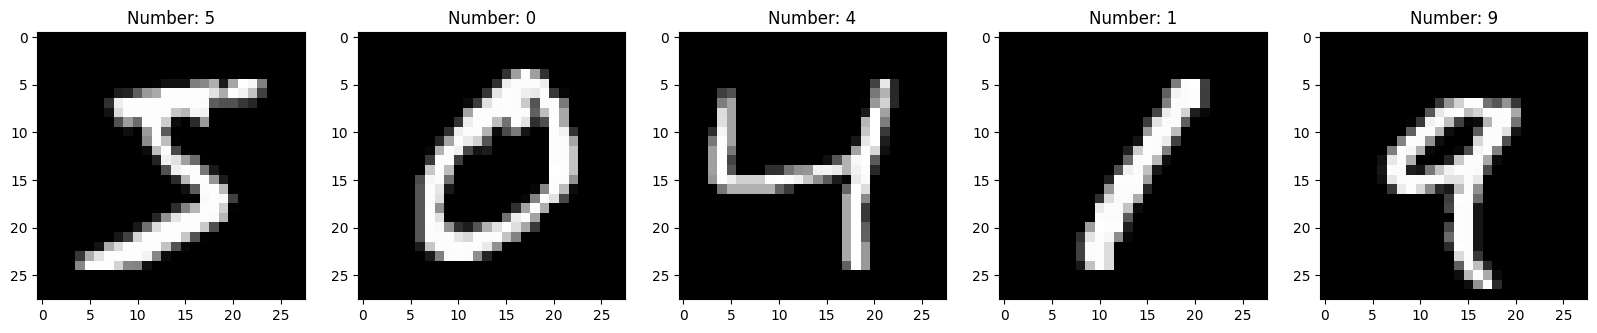

In [21]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[:5], mnist.target[:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (28,28)), cmap='gray')
    plt.title(f"Number: {label}")

In [25]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

In [29]:
mdl = LogisticRegression(solver='lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9216428571428571


STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
mdl.predict([X_test[0]])[0]

'7'

Predictions: 8


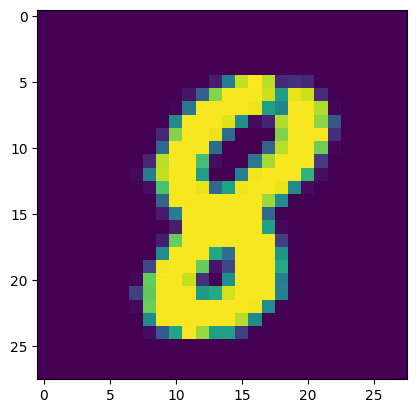

In [39]:
index = 3
plt.imshow(np.reshape(X_test[index], (28,28)))
print("Predictions: " + mdl.predict([X_test[index]])[0])

In [52]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1326,    0,    6,    1,    3,   12,    6,    3,    6,    1],
       [   0, 1505,    9,    5,    0,    8,    2,    3,   14,    4],
       [   8,   17, 1254,   24,   17,    5,   14,   11,   44,    2],
       [  10,    4,   32, 1288,    1,   59,    7,   12,   36,   10],
       [   3,    5,    8,    1, 1321,    1,   12,    3,    7,   50],
       [  14,    4,    9,   47,   11, 1085,   22,    6,   45,   12],
       [   8,    8,   17,    0,    7,   20, 1283,    2,    5,    1],
       [   7,    3,   17,    6,   17,    2,    0, 1361,    2,   49],
       [   9,   26,   16,   32,    8,   31,    9,    6, 1215,    8],
       [   6,    7,    2,   19,   37,    6,    0,   30,   18, 1265]])

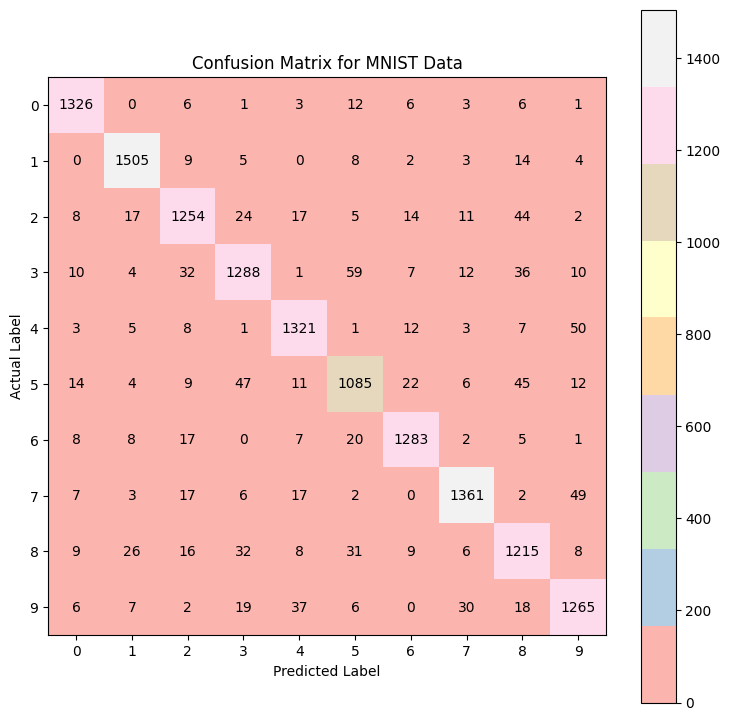

In [63]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap='Pastel1')
plt.title('Confusion Matrix for MNIST Data')

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

plt.colorbar()

width, height = cm.shape
for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy = (y,x), horizontalalignment = 'center', verticalalignment='center')